# Examples of bivariate normal distributions with various dependencies

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 

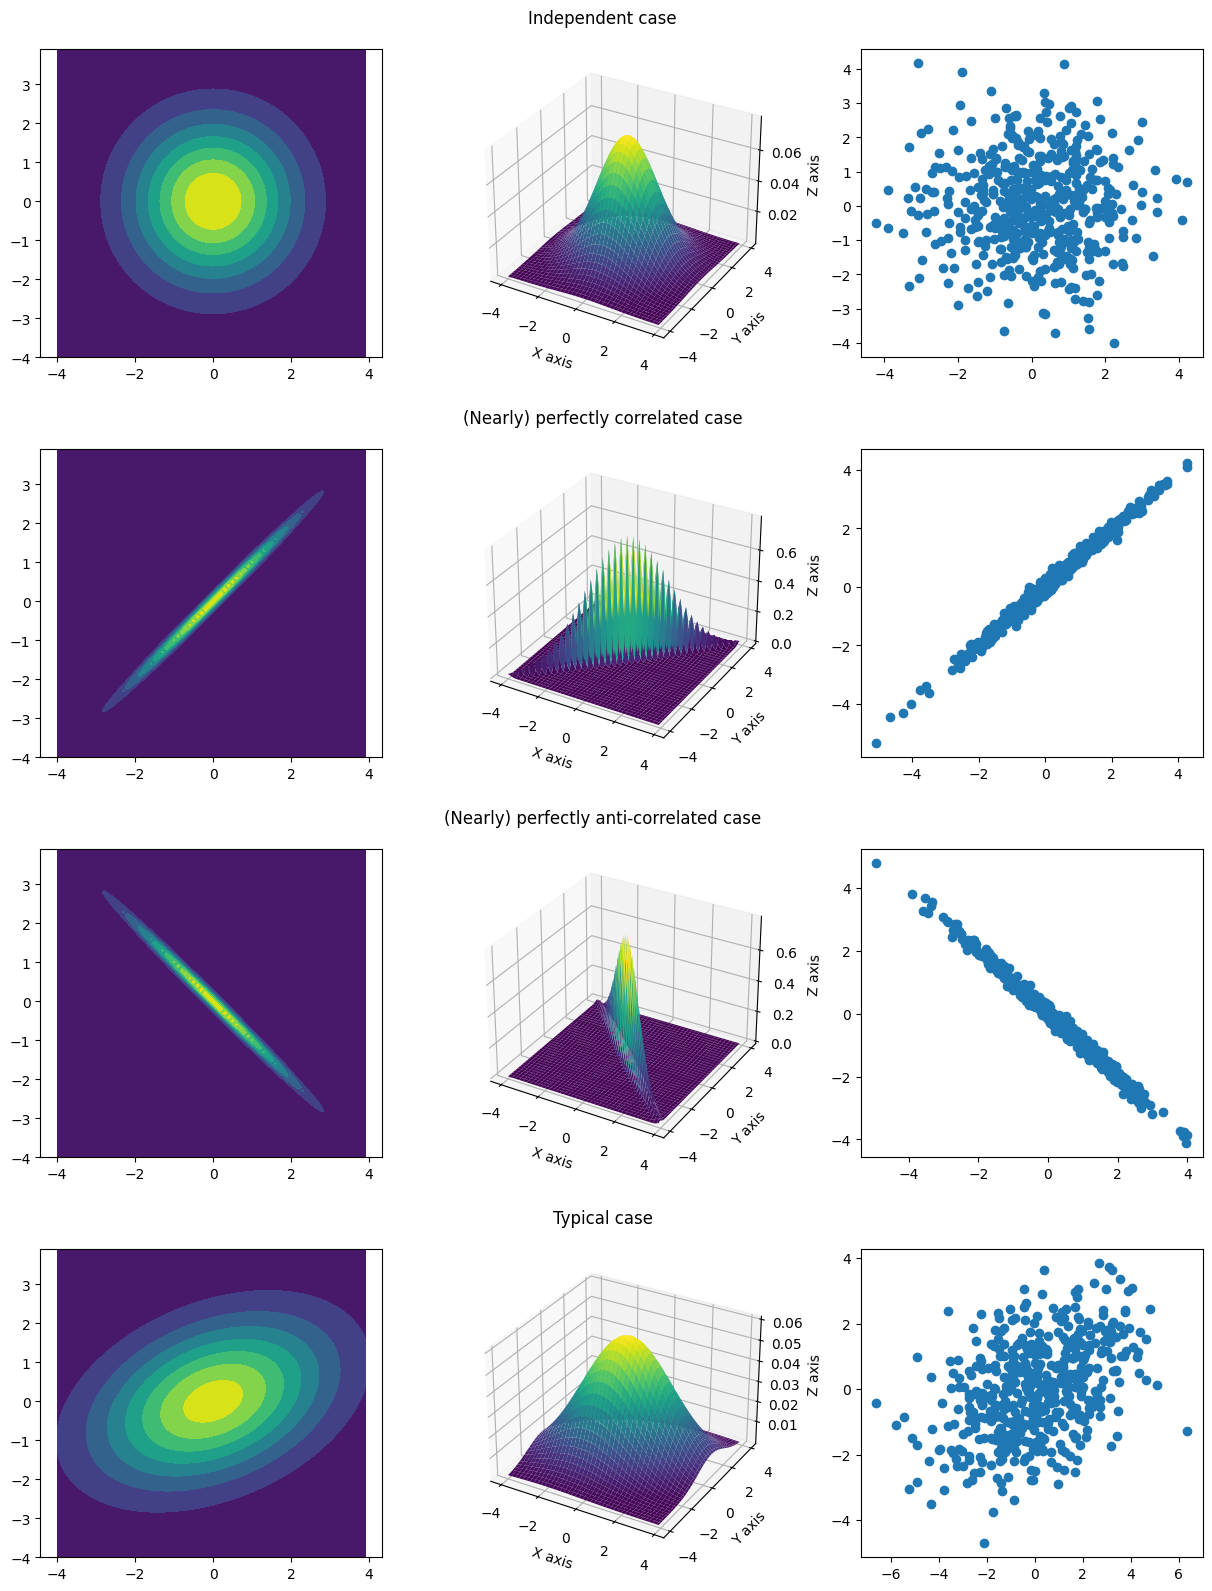

In [10]:
x, y = np.mgrid[-4:4:0.1, -4:4:0.1]

mu_vec = [0, 0]
cov_matrix = []
names = []
# Add covariance matrix for an independent / product measure
cov_matrix.append([[2, 0], [0, 2]])
names.append('Independent case')

# Add covariance matrix for an almost perfectly correlated joint distribution
cov_matrix.append([[2, 1.99], [1.99, 2]])
names.append('(Nearly) perfectly correlated case')

# Add covariance matrix for an almost perfectly anti-correlated joint distribution
cov_matrix.append([[2, -1.99], [-1.99, 2]])
names.append('(Nearly) perfectly anti-correlated case')

# Add covariance matrix for a "typical" joint distribution
cov_matrix.append([[4,1],[1,2]])
names.append('Typical case')

pos = np.dstack((x, y))

fig = plt.figure(figsize=(15,16))
subfigs = fig.subfigures(4, 1, wspace=0.07)
i=0
N = 500

for S in cov_matrix:
    # Create the bivariate normal distribution with covariance matrix S
    rv = stats.multivariate_normal(mu_vec, S)
    # Create 3 subplots
    ax1 = subfigs[i].add_subplot(1, 3, 1)
    ax2 = subfigs[i].add_subplot(1, 3, 2, projection='3d')
    ax3 = subfigs[i].add_subplot(1, 3, 3)
    # Plot contour graph of pdf
    ax1.axis('equal')
    ax1.contourf(x, y, rv.pdf(pos))
    # Plot 3-D graph of pdf
    ax2.plot_surface(x, y, rv.pdf(pos),cmap='viridis',linewidth=0)
    ax2.set_xlabel('X axis')
    ax2.set_ylabel('Y axis')
    ax2.set_zlabel('Z axis')
    # Sample from bivariate normal distribution with covariance matrix S and plot
    samples = rv.rvs(size=N)
    reordered_samples = np.moveaxis(samples,1, 0)
    ax3.scatter(reordered_samples[0],reordered_samples[1])
    subfigs[i].suptitle(names[i])
    i += 1

plt.show()

# Example of distributions which are uncorrelated but not independent

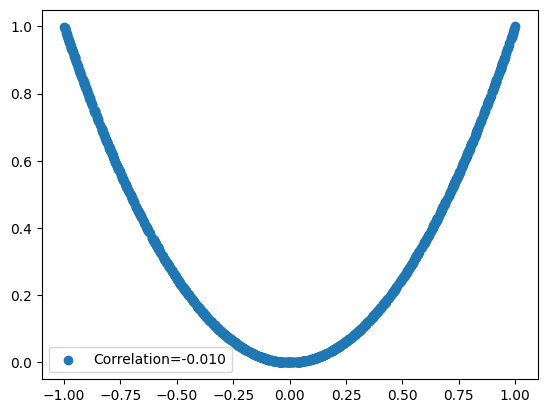

In [88]:
# Sampling
seed = 101
size = 1000
x = stats.uniform.rvs(loc=-1, scale=2, size=size, random_state=seed)
y = x**2
plt.scatter(x, y, label='Correlation={:.3f}'.format(np.corrcoef(x,y)[0,1]))
plt.legend()
plt.show()